In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("products_ingredients_nutritional_08-10-2019.csv")  

In [2]:
data.head()

,product_id,product_name,ingredient_id,ingredient_name,calories,carbs,fat,fiber,protein
0,1,5-Block Power Breakfast,1,Egg,500,36,19,NaN,45
1,1,5-Block Power Breakfast,2,Ground Chicken,500,36,19,NaN,45
2,1,5-Block Power Breakfast,3,Sweet Potato,500,36,19,NaN,45
3,1,5-Block Power Breakfast,4,Onion,500,36,19,NaN,45
4,1,5-Block Power Breakfast,5,Red Pepper,500,36,19,NaN,45


In [3]:
data.tail()

,product_id,product_name,ingredient_id,ingredient_name,calories,carbs,fat,fiber,protein
16466,7510,Turkey Burger with Pesto Cauliflower and Olive...,635,Garlic Confit,580,14,47,NaN,27
16467,7510,Turkey Burger with Pesto Cauliflower and Olive...,1056,Dried Oregano Leaves,580,14,47,NaN,27
16468,7510,Turkey Burger with Pesto Cauliflower and Olive...,1071,Citrus Extracts,580,14,47,NaN,27
16469,7510,Turkey Burger with Pesto Cauliflower and Olive...,1072,Pomegranate Extract,580,14,47,NaN,27
16470,7510,Turkey Burger with Pesto Cauliflower and Olive...,1073,Rosemary Extract,580,14,47,NaN,27


In [4]:
# tabla de frecuenta de ingredientes
data['ingredient_name'].value_counts()

Garlic                        563
Pepper                        469
Onion                         429
Black Pepper                  354
Parsley                       305
Coconut Milk                  299
Thyme                         283
Lemon Juice                   280
Paprika                       276
Egg                           255
Apple Cider Vinegar           249
Cumin                         208
Onion Powder                  206
Chicken Breast                198
Honey                         195
Cilantro                      190
Garlic Powder                 174
Ginger                        161
Tomato                        161
Coconut Aminos                160
Cauliflower                   157
Chicken                       151
Kale                          150
Carrots                       149
Sweet Potato                  147
Cinnamon                      146
Water                         142
Garlic Confit                 142
Cayenne Pepper                141
Maple Syrup   

In [5]:
fiber=data['fiber'].values.reshape(-1, 1)
fiber

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [6]:
# tratar los valores faltantes NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy ='mean',axis=0)
imputer.fit(fiber)
data['fiber']=imputer.transform(fiber)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
data.head()

,product_id,product_name,ingredient_id,ingredient_name,calories,carbs,fat,fiber,protein
0,1,5-Block Power Breakfast,1,Egg,500,36,19,6.650862,45
1,1,5-Block Power Breakfast,2,Ground Chicken,500,36,19,6.650862,45
2,1,5-Block Power Breakfast,3,Sweet Potato,500,36,19,6.650862,45
3,1,5-Block Power Breakfast,4,Onion,500,36,19,6.650862,45
4,1,5-Block Power Breakfast,5,Red Pepper,500,36,19,6.650862,45


In [8]:
# Tabla de contingencia 
cross_data=pd.crosstab(index=data['product_id'],
            columns=data['ingredient_name'], margins=False)

cross_data

ingredient_name,Acorn Squash,Adobo Pepper,Adobo Sauce,African Spice Blend,Agar Agar Powder,Aged Cayenne Red Peppers,Aise Sauce,Aleppo Pepper,Algae Protein,Algal Caesar Dressing,...,Yellow Summer Squash,Yellow Tomatoes,Yellow Zucchini,Yuca,Yucca,Yucca Celery,Yucca Root,Yukon Gold Potato,Zucchini,Zucchini Hummus
product_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ingredient_names=data['ingredient_name'].unique()
ingredient_names

array(['Egg', 'Ground Chicken', 'Sweet Potato', ...,
       'Unsweetened Shredded Coconut', 'Canned Crushed Tomatoes',
       'Dried Apricots'], dtype=object)

In [10]:
# agrupamos de una forma
products=data.groupby(['product_id', 'product_name', 'calories', 'carbs', 'fat', 'fiber', 'protein', 'ingredient_name'], as_index=False).size().unstack(fill_value=0.0).reset_index()


In [11]:
products.head()

ingredient_name,product_id,product_name,calories,carbs,fat,fiber,protein,Acorn Squash,Adobo Pepper,Adobo Sauce,...,Yellow Summer Squash,Yellow Tomatoes,Yellow Zucchini,Yuca,Yucca,Yucca Celery,Yucca Root,Yukon Gold Potato,Zucchini,Zucchini Hummus
0,1,5-Block Power Breakfast,500,36,19,6.650862,45,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Chicken & Mash (Zone),470,48,15,6.650862,38,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Bacon and Eggs,480,15,33,6.650862,31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Very Veggie Omelet,430,16,32,6.650862,20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Steak N' Eggs (Old),610,15,38,6.650862,51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X=products.drop(['product_id', 'product_name', 'calories', 'carbs', 'fat', 'fiber', 'protein'], axis=1).values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
product_ids=products['product_id']
product_ids.values

array([   1,    2,    3, ..., 7508, 7509, 7510])

In [14]:
product_names=products['product_name']
product_names.values

array(['5-Block Power Breakfast', 'Chicken & Mash (Zone)',
       'Bacon and Eggs', ...,
       'Turkey Burger with Pesto Cauliflower and Olive Tapenade',
       'Athlete Olive Tapenade Turkey Burger with Butternut Squash and Rice',
       'Turkey Burger with Pesto Cauliflower and Olive Tapenade ( Keto-Friendly)'],
      dtype=object)

In [15]:
#from sklearn.model_selection import train_test_split
#X_train,X_test=train_test_split(X,test_size = 0.2, random_state = 0)

In [16]:
#len(X_train)

In [17]:
#len(X_test)

In [18]:
# normalización
#from sklearn.preprocessing import StandardScaler
#sc_X=StandardScaler()
#X=sc_X.fit_transform(X)
#X_train=sc_X.fit_transform(X_train)
#X_test =sc_X.transform(X_test)

In [19]:
#X_train

In [20]:
#X_test

In [23]:
# 1. Elegimos la clase de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos el modelo con sus hiperparámetros
model = GaussianMixture(n_components=50,
            covariance_type='full', random_state=5)  

# 3. Ajustamos a los datos. Notar que "y" no es especificada
model.fit(X)                    

# 4. Determinamos las etiquetas de los clusters
meals_predicted = model.predict(X)  

In [24]:
meals_predicted.shape

(1110,)

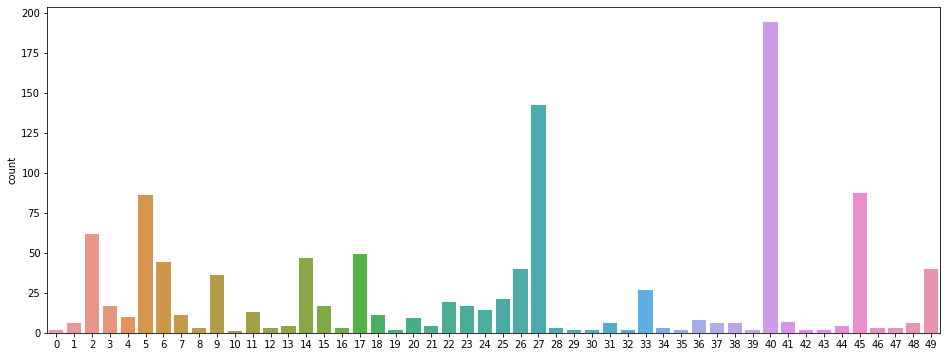

In [25]:
plt.figure(figsize=(16, 6))
sns.countplot(meals_predicted) 

In [26]:
# crear dataframe con predicciones y descripciones originales
product_classes=pd.DataFrame({'class': meals_predicted,
                              'product': products['product_name'].values,
                              'product_id': products['product_id'].values,
                              'calories': products['calories'].values,
                               'carbs': products['carbs'].values,
                               'fat': products['fat'].values,
                               'fiber': products['fiber'].values,
                               'protein': products['protein'].values
                        })

In [27]:
# listar los clusters
product_classes.sort_values('class')

,class,product,product_id,calories,carbs,fat,fiber,protein
868,0,Athlete Grilled Chicken and Roasted Plantains ...,7133,480,52,13,6.650862,42
867,0,Grilled Chicken and Roasted Butternut Squash w...,7132,410,25,16,6.650862,43
119,1,Lamb Shawarma with Garlic Aioli,135,450,10,29,6.650862,37
99,1,Hearty Curried Beef Stew,113,495,36,21,6.650862,39
104,1,Winter Braised Lamb,119,480,32,24,6.650862,34
585,1,Athlete Beef Stew with Mashed Potatoes,636,485,42,15,6.650862,46
148,1,Chicken Mole with Asparagus,168,400,16,18,6.650862,44
584,1,Hearty Beef Stew with Roasted Vegetables,635,405,21,15,6.650862,46
152,2,Italian Sausage with Parsnip Mash,172,440,19,28,6.650862,23
155,2,Carne Asada with Tomatillo Avocado Salsa,176,355,10,19,6.650862,36


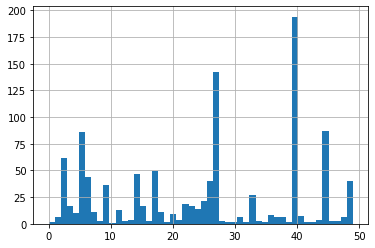

In [30]:
# cuantas comidas hay por clase?
product_classes['class'].hist(bins=50)

In [31]:
# ver una clase
product_classes[product_classes['class']==4]

,class,product,product_id,calories,carbs,fat,fiber,protein
1013,4,Herb-Crusted Pork Loin with Bacon Date Relish ...,7380,360,20,15,6.650862,41
1014,4,Athlete Roasted Pork Loin with Bacon Date Reli...,7381,480,44,16,6.650862,41
1015,4,Roasted Pork Loin with Bacon Shiitake Mushroom...,7382,570,13,46,6.650862,30
1028,4,Herb Crusted Pork Loin with Bacon Cauliflower ...,7399,570,13,46,5.000000,30
1084,4,Grilled Chicken with Broccoli and Winter White...,7469,390,20,16,6.650862,46
1085,4,Athlete Grilled Chicken with Yuca Mash and Win...,7470,520,45,19,6.650862,45
1086,4,Grilled Chicken with Broccoli and Winter White...,7471,580,16,45,6.000000,31
1102,4,Cashew Chicken with Turmeric Cauliflower,7499,430,15,22,6.650862,45
1103,4,Athlete Cashew Chicken with Broccoli and Rice,7500,490,44,14,6.650862,47
1104,4,Cashew Chicken with Turmeric Cauliflower and B...,7501,580,16,46,6.650862,29


In [37]:
# 1. Seleccionar la clase de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar el modelo con hiperparámetros
model = PCA(n_components=2)            

# 3. Ajustar a los datos. Notar que no especificamos "y" 
model.fit(X)                      

# 4. Transformar los datos a dos dimensiones
X_2D = model.transform(X)   

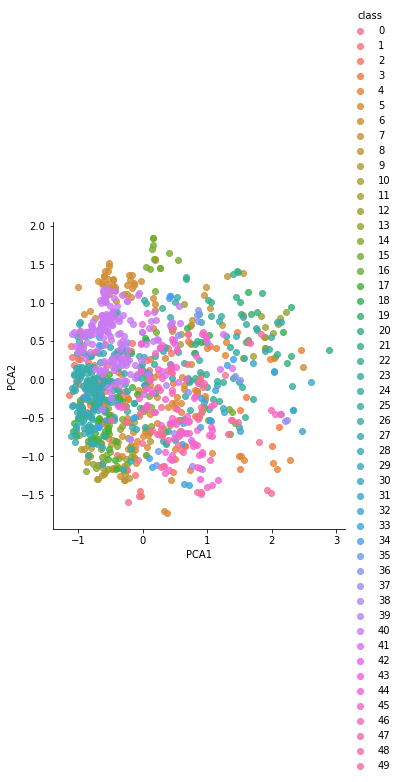

In [42]:
product_classes['PCA1'] = X_2D[:, 0]
product_classes['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='class', data=product_classes, fit_reg=False)

<Figure size 1080x1080 with 0 Axes>

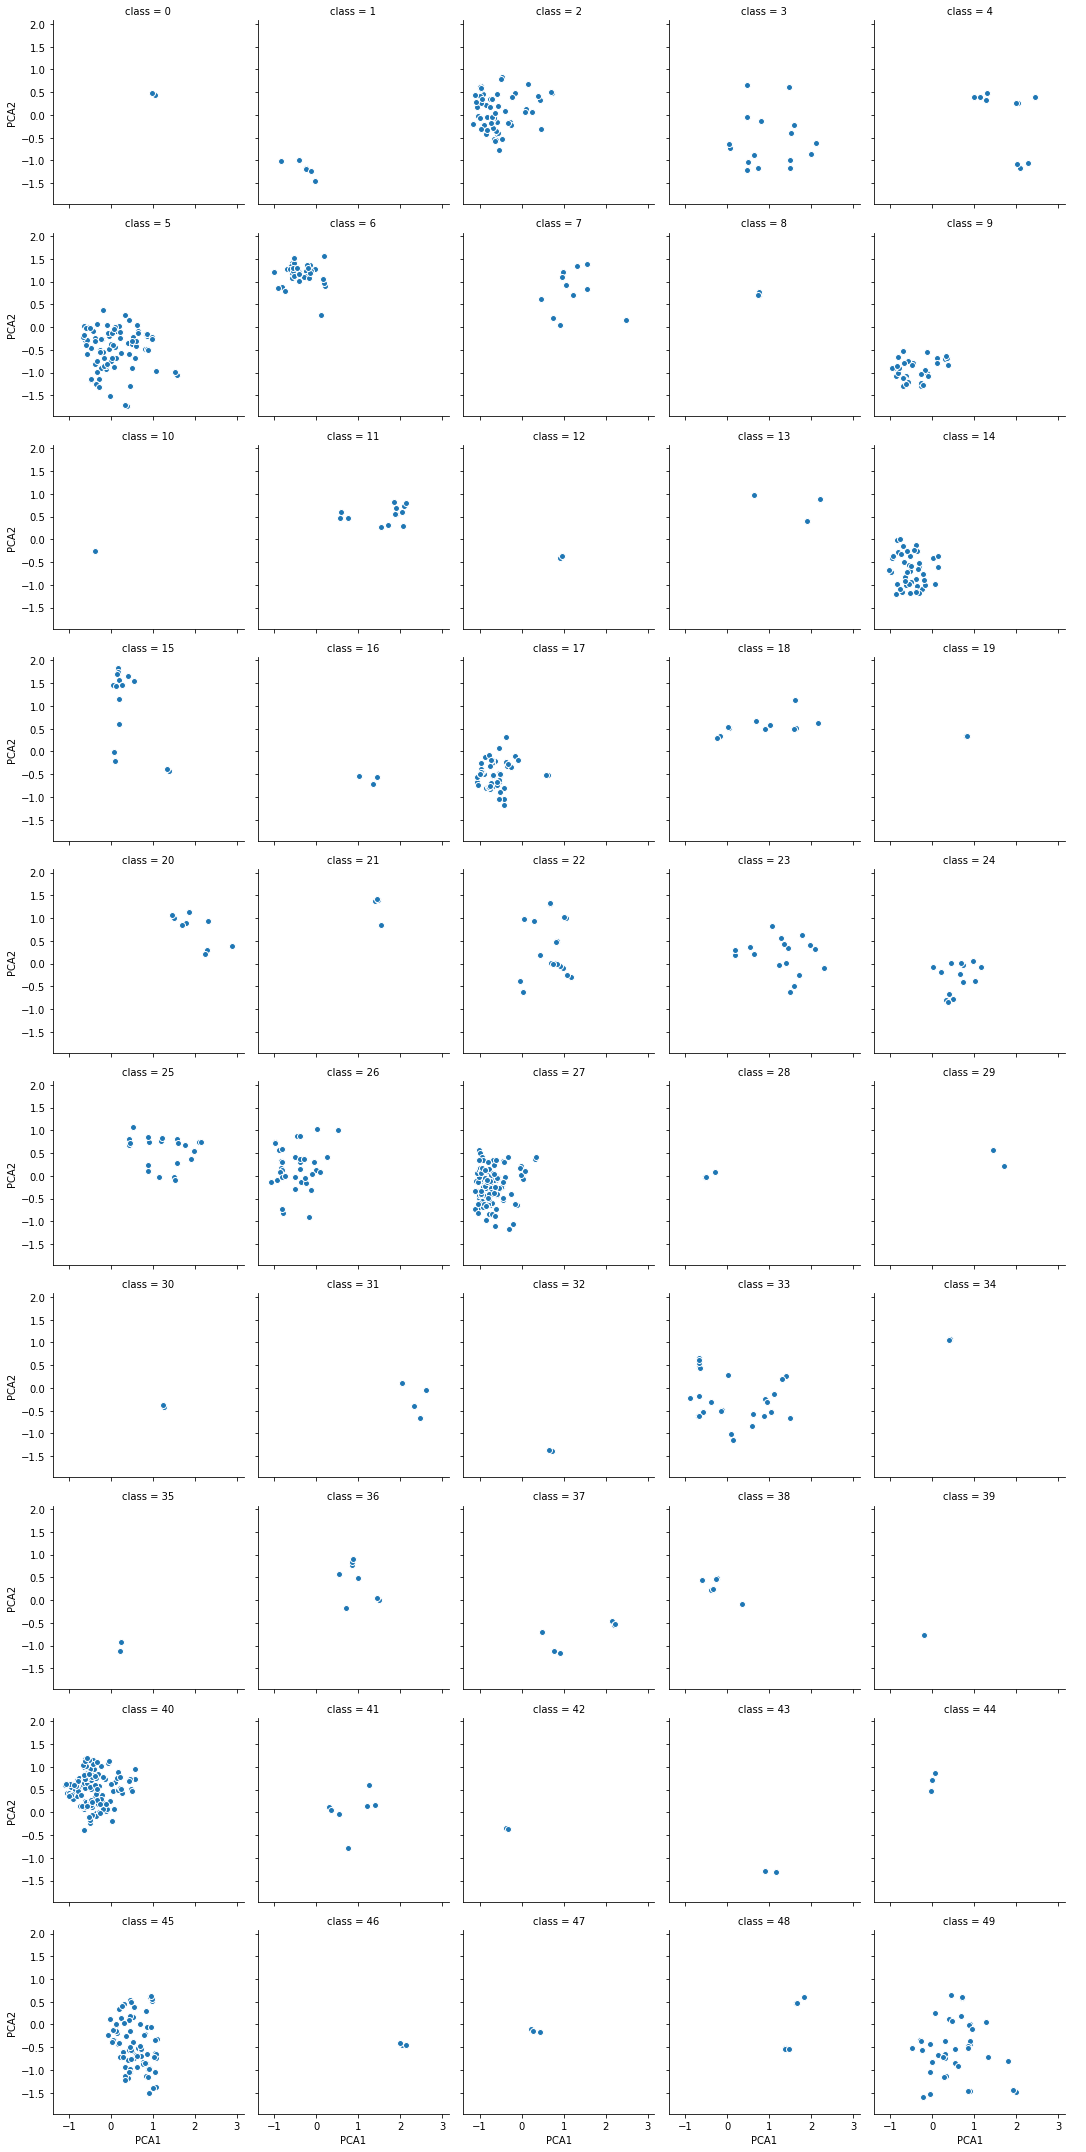

In [43]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(product_classes, col="class", col_wrap=5, height=3)
g = (g.map(plt.scatter, "PCA1", "PCA2", edgecolor="w").add_legend())